11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0802
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0187
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0105
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - loss: 0.0072
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0053
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


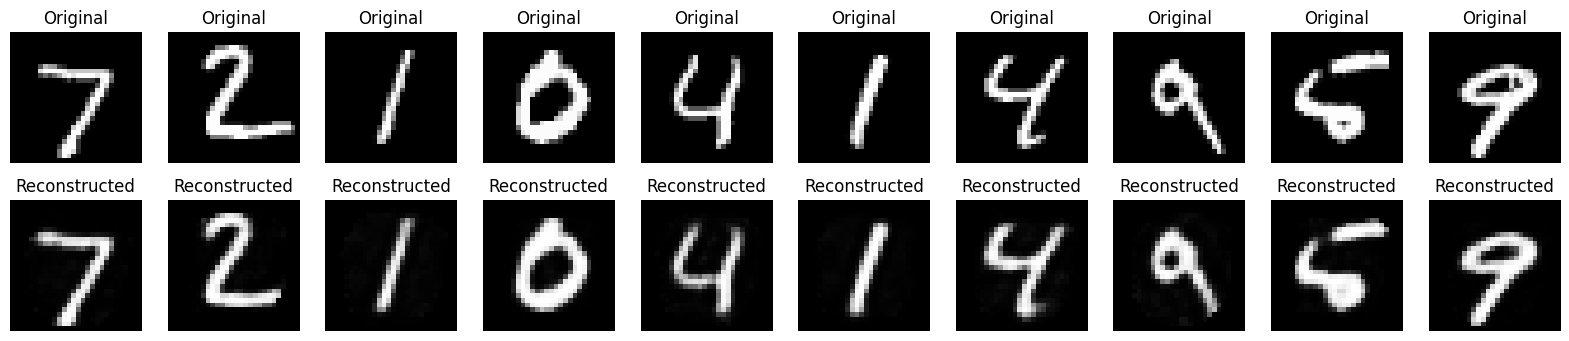

In [ ]:
#5. Develop a model to construct deep network using auto encoders.

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

#Load the mnist dataset
(x_train,_),(x_test,_) = mnist.load_data()

#Normalization
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

#Flatten the images
x_train =x_train.reshape((x_train.shape[0],-1))
x_test=x_test.reshape((x_test.shape[0],-1))

#Dimensions
input_dim =x_train.shape[1] #784
encoding_dim =168

#Autoencoder Structre
input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim,activation="relu")(input_layer)
decoder = Dense(input_dim,activation="sigmoid")(encoder)

#Train the autoencoder =Model, .compile, .fit
autoencoder = Model(inputs=input_layer,outputs=decoder)
autoencoder.compile(optimizer="adam",loss="mse")
autoencoder.fit(x_train,x_train,epochs=5,batch_size=256,shuffle=True,verbose=1)

#Test reconstruction
reconstructed_images=autoencoder.predict(x_test[:10])

#Visualize Original vs Reconstructed Images
n=10
plt.figure(figsize=(20,4))
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28),cmap='gray')
  plt.title('Original')
  plt.axis('off')

  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(reconstructed_images[i].reshape(28,28),cmap='gray')
  plt.title('Reconstructed')
  plt.axis('off')
plt.show()